### Leveraging Wearable Technology and Machine Learning for Comprehensive Maternal Health Monitoring.

#### Exploratory Data Analysis

In [3]:
#!pip install pandas numpy
#pip uninstall pandas numpy -y

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\
First few rows:")
print(df.head())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
First few rows:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low ris

##### Let's create and evaluate multiple models including Logistic Regression, Random Forest, XGBoost, and a Neural Network. We'll compare their performance and save the best model.

In [12]:
# Prepare the data
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [13]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [14]:
y.head()

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object

##### ENCODING

In [15]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


In [18]:
y

array([0, 0, 0, ..., 0, 0, 2])

#### Splitting the data 20% test vs 80% Training

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train.size,y_train.size , X_test.size, y_test.size

(4866, 811, 1218, 203)

### 1: LOGISTIC REGRESSION

In [21]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

##### Evaluating the model

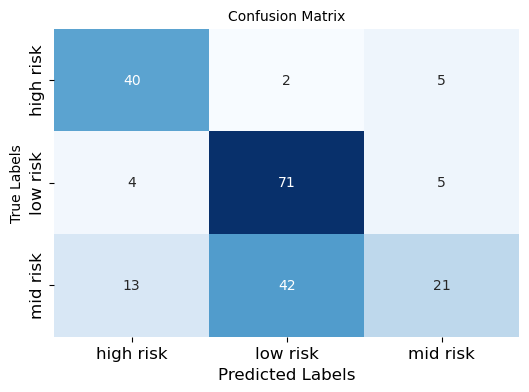

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Define class names based on the encoded labels
class_names = le.classes_  # ['high risk', 'low risk', 'mid risk']

# Visualize confusion matrix with enhanced style
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.tick_params(axis='both', labelsize=12)
plt.show()



In [23]:
# Compute accuracy
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6502463054187192


## 2. Random Forest

In [24]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

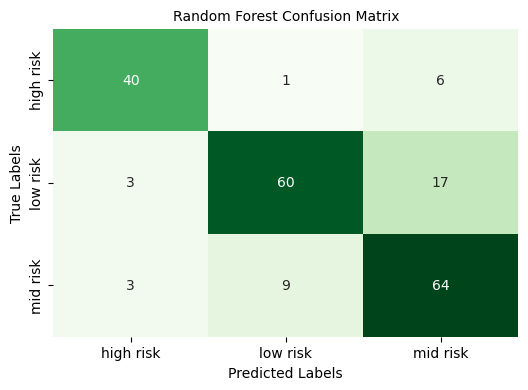

Random Forest Accuracy: 0.81


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the Random Forest model
rf_pred = rf_model.predict(X_test_scaled)

# Generate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)

# Get the original class names from the LabelEncoder
class_names = list(le.classes_)  # Ensure class_names is a list of strings

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('True Labels', fontsize=10)
plt.title('Random Forest Confusion Matrix', fontsize=10)
plt.tick_params(axis='both', labelsize=10)
plt.show()

# Print accuracy and classification report
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, rf_pred, target_names=class_names))


##  3. XGBoost

In [31]:
#pip install xgboost
#!pip install tensorflow

In [32]:
# 3. XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

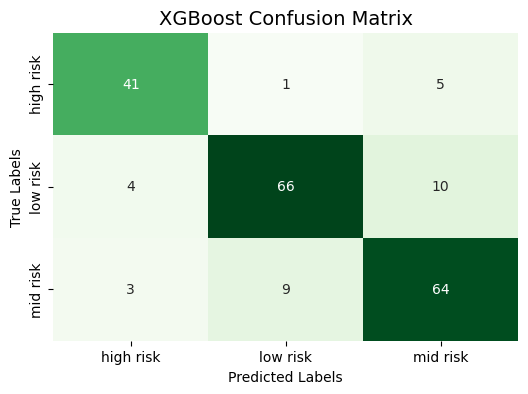

XGBoost Accuracy: 0.84


In [33]:
# 3. XGBoost
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Generate predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, xgb_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_pred)

# Get the original class names from the LabelEncoder
# Assuming you have a LabelEncoder object named `le` used for encoding the target classes
class_names = list(le.classes_) if 'le' in locals() else [f"Class {i}" for i in range(len(set(y_test)))]

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('True Labels', fontsize=10)
plt.title('XGBoost Confusion Matrix', fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.show()

# Print accuracy and classification report
print(f"XGBoost Accuracy: {accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, xgb_pred, target_names=class_names))


## Artificial Neural Networks

In [38]:
import numpy as np
np.bool = bool  # Patch to replace np.bool with the built-in bool type
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the ANN model
def create_ann_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(528, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout to prevent overfitting
    model.add(Dense(364, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(264, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(148, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification
    return model

# Determine the input dimension and number of classes
ann_input_dim = X_train_scaled.shape[1]
ann_num_classes = len(set(y_train))  


# Create the ANN model
ann_model = create_ann_model(ann_input_dim, ann_num_classes)

# Compile the model
ann_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Define early stopping
ann_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the ANN model
ann_history = ann_model.fit(X_train_scaled, y_train, 
                            epochs=500, 
                            batch_size=10, 
                            validation_split=0.2, 
                            callbacks=[ann_early_stopping], 
                            verbose=1)

Epoch 1/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5087 - loss: 1.0041 - val_accuracy: 0.6135 - val_loss: 0.7390
Epoch 2/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6212 - loss: 0.7502 - val_accuracy: 0.6626 - val_loss: 0.7157
Epoch 3/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7066 - loss: 0.6859 - val_accuracy: 0.6196 - val_loss: 0.6980
Epoch 4/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6953 - loss: 0.7125 - val_accuracy: 0.6380 - val_loss: 0.6735
Epoch 5/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6674 - loss: 0.6751 - val_accuracy: 0.6442 - val_loss: 0.6661
Epoch 6/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7017 - loss: 0.6540 - val_accuracy: 0.6319 - val_loss: 0.6794
Epoch 7/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7350 - loss: 0.5873 - val_accuracy: 0.6319 - val_loss: 0.6933
Epoch 8/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6969 - loss: 0.6255 - val_accuracy: 0.6380 

## HYPER PARAMETER TUNNING TO IMPROVE THE MODEL

In [51]:
#pip install keras-tuner

In [53]:
import numpy as np
#np.bool = bool  # Patch to replace np.bool with the built-in bool type
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Determine input dimension and number of classes
ann_input_dim = X_train_scaled.shape[1]
ann_num_classes = len(set(y_train))  

# Define the model builder function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=128, max_value=512, step=64), 
        activation='relu', 
        input_dim=ann_input_dim
    ))
    model.add(Dropout(hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=128, max_value=512, step=64), 
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Third hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=128, max_value=512, step=64), 
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_layer3', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(ann_num_classes, activation='softmax'))  # Softmax for multi-class classification
    
    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create the Keras Tuner RandomSearch object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter configurations to try
    executions_per_trial=2,  # Number of models to train per configuration
    directory='my_dir',
    project_name='ann_tuning'
)

# Perform the hyperparameter search
tuner.search(
    X_train_scaled, y_train, 
    epochs=50, 
    validation_split=0.2, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units for the first hidden layer is {best_hps.get('units_layer1')}.
The optimal number of units for the second hidden layer is {best_hps.get('units_layer2')}.
The optimal number of units for the third hidden layer is {best_hps.get('units_layer3')}.
The optimal dropout rates are {best_hps.get('dropout_layer1')}, {best_hps.get('dropout_layer2')}, {best_hps.get('dropout_layer3')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Train the best model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")


Trial 10 Complete [00h 00m 30s]
val_accuracy: 0.6809816062450409

Best val_accuracy So Far: 0.702454000711441
Total elapsed time: 00h 04m 41s

The optimal number of units for the first hidden layer is 384.
The optimal number of units for the second hidden layer is 256.
The optimal number of units for the third hidden layer is 192.
The optimal dropout rates are 0.2, 0.30000000000000004, 0.2.
The optimal learning rate is 0.01.

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5410 - loss: 0.9554 - val_accuracy: 0.5890 - val_loss: 0.9290
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6465 - loss: 0.8390 - val_accuracy: 0.6564 - val_loss: 0.7419
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6976 - loss: 0.7059 - val_accuracy: 0.6319 - val_loss: 0.7173
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7000 - loss: 0.6606 - val_accuracy: 0.6196 - val_loss: 0.6911
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accu

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ANN Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

   high risk       0.77      0.87      0.82        47
    low risk       0.61      0.85      0.71        80
    mid risk       0.74      0.38      0.50        76

    accuracy                           0.68       203
   macro avg       0.71      0.70      0.68       203
weighted avg       0.70      0.68      0.66       203



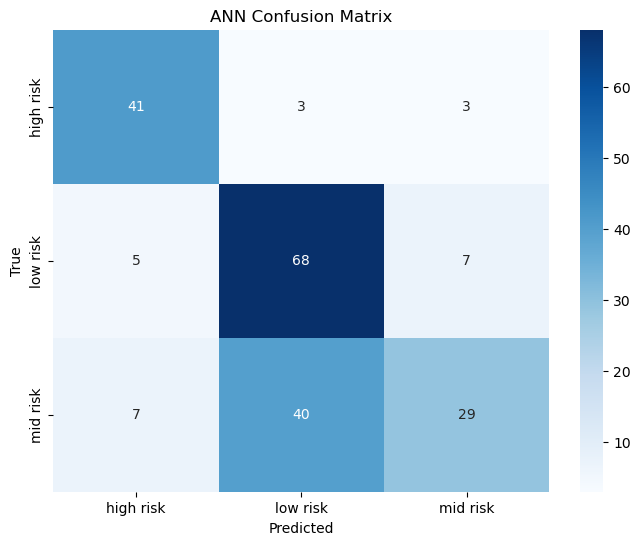

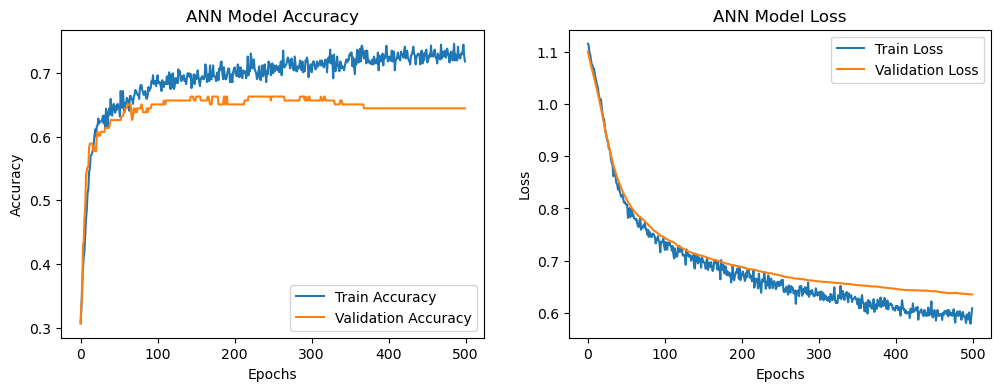

In [54]:

# Evaluate the model
ann_pred_prob = ann_model.predict(X_test_scaled)
ann_pred = ann_pred_prob.argmax(axis=1)

# Accuracy
ann_accuracy = accuracy_score(y_test, ann_pred)
print(f"ANN Accuracy: {ann_accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, ann_pred, target_names=class_names))

# Confusion matrix
ann_cm = confusion_matrix(y_test, ann_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Model Loss')
plt.legend()
plt.show()


In [58]:

nn_pred = np.argmax(best_model.predict(X_test_scaled), axis=1)
# Evaluate all models
models = {
    'Logistic Regression': lr_pred,
    'Random Forest': rf_pred,
    'XGBoost': xgb_pred,
    'Neural Network': nn_pred
}

print("Model Evaluation Metrics:\
")
for name, predictions in models.items():
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"Precision: {precision_score(y_test, predictions, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, predictions, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, predictions, average='weighted'):.4f}")
    print("-" * 50)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Model Evaluation Metrics:
Logistic Regression:
Accuracy: 0.6502
Precision: 0.6594
Recall: 0.6502
F1-score: 0.6120
--------------------------------------------------
Random Forest:
Accuracy: 0.8079
Precision: 0.8145
Recall: 0.8079
F1-score: 0.8084
--------------------------------------------------
XGBoost:
Accuracy: 0.8424
Precision: 0.8433
Recall: 0.8424
F1-score: 0.8425
--------------------------------------------------
Neural Network:
Accuracy: 0.6650
Precision: 0.6749
Recall: 0.6650
F1-score: 0.6455
--------------------------------------------------


## KNN & SVM


Training SVM Classifier...
Support Vector Machine (SVM) Evaluation Metrics:
Accuracy: 0.68
Precision: 0.70
Recall: 0.68
F1 Score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        47
           1       0.61      0.88      0.72        80
           2       0.74      0.37      0.49        76

    accuracy                           0.68       203
   macro avg       0.72      0.70      0.68       203
weighted avg       0.70      0.68      0.66       203



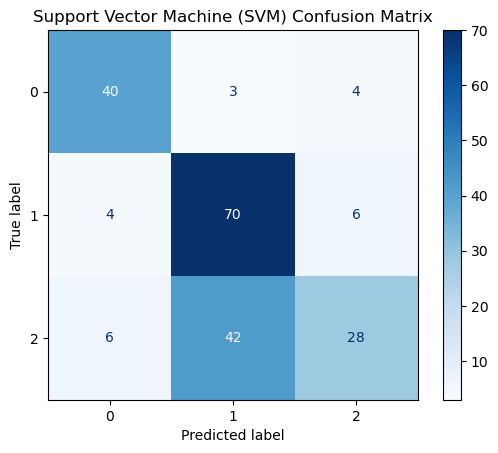


Training KNN Classifier...
K-Nearest Neighbors (KNN) Evaluation Metrics:
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1 Score: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        47
           1       0.60      0.72      0.66        80
           2       0.61      0.45      0.52        76

    accuracy                           0.64       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.64      0.64      0.63       203



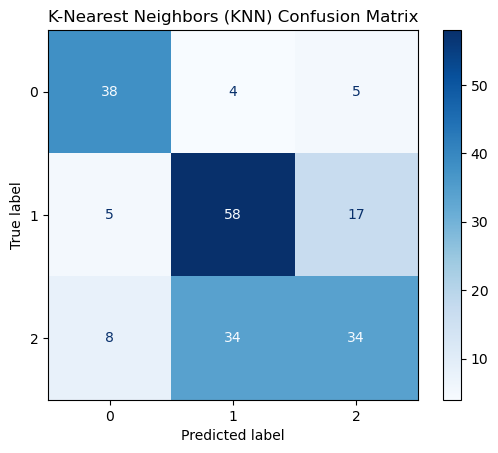

In [59]:
# Import necessary libraries for SVM and KNN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display results
    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Label encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==============================
# Support Vector Machine (SVM)
# ==============================
print("\nTraining SVM Classifier...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train_encoded)

# Evaluate SVM
evaluate_model(svm_model, X_test_scaled, y_test_encoded, "Support Vector Machine (SVM)")

# ==============================
# K-Nearest Neighbors (KNN)
# ==============================
print("\nTraining KNN Classifier...")
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned
knn_model.fit(X_train_scaled, y_train_encoded)

# Evaluate KNN
evaluate_model(knn_model, X_test_scaled, y_test_encoded, "K-Nearest Neighbors (KNN)")



Training Decision Tree Classifier...
Decision Tree Evaluation Metrics:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


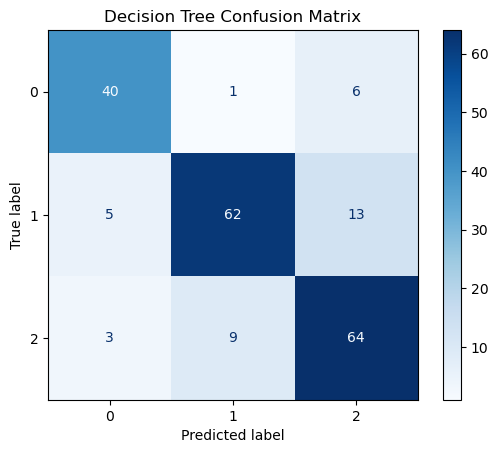

In [61]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Label encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==============================
# Decision Tree Classifier
# ==============================
print("\nTraining Decision Tree Classifier...")

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=None)  # Customize parameters as needed
dt_model.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print("Decision Tree Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


## LSTM

Reloading Tuner from lstm_tuning\maternal_health_lstm\tuner0.json

Optimal Number of Units in Layer 1: 448
Optimal Number of Units in Layer 2: 224
Optimal Number of Dense Units: 48
Optimal Dropout Rates: 0.2, 0.2, 0.1
Optimal Learning Rate: 0.01

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.5507 - loss: 0.9539 - val_accuracy: 0.5890 - val_loss: 0.7634
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5556 - loss: 0.8365 - val_accuracy: 0.6135 - val_loss: 0.6808
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6194 - loss: 0.7215 - val_accuracy: 0.6196 - val_loss: 0.7708
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7126 - loss: 0.6567 - val_accuracy: 0.6503 - val_loss: 0.6879
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7026 - loss: 0.6702 - val_accuracy: 0.6626 - val_loss: 0.6894
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6980 - loss: 0.6668 - val_accuracy: 0.6748 - va

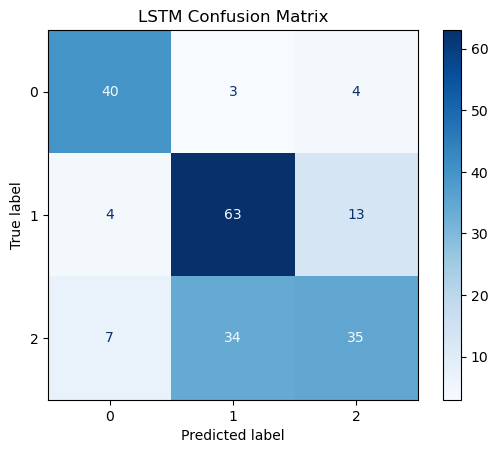

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))

# Reshape the input data for LSTM
X_train_reshaped = np.expand_dims(X_train_scaled, axis=1)  # Add a time-step dimension
X_test_reshaped = np.expand_dims(X_test_scaled, axis=1)

# ==============================
# Define the LSTM model builder for Keras Tuner
# ==============================
def build_lstm_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    
    # First LSTM layer
    model.add(LSTM(
        units=hp.Int('units_layer1', min_value=64, max_value=640, step=64),
        activation='tanh',
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_layer1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Second LSTM layer
    model.add(LSTM(
        units=hp.Int('units_layer2', min_value=32, max_value=320, step=32),
        activation='tanh',
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Fully connected layers
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_dense', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ==============================
# Perform Hyperparameter Tuning with Keras Tuner
# ==============================
tuner = RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per combination
    directory='lstm_tuning',
    project_name='maternal_health_lstm'
)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(
    X_train_reshaped, y_train_encoded,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# ==============================
# Train the Best Model
# ==============================
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Optimal Number of Units in Layer 1: {best_hps.get('units_layer1')}
Optimal Number of Units in Layer 2: {best_hps.get('units_layer2')}
Optimal Number of Dense Units: {best_hps.get('dense_units')}
Optimal Dropout Rates: {best_hps.get('dropout_layer1')}, {best_hps.get('dropout_layer2')}, {best_hps.get('dropout_dense')}
Optimal Learning Rate: {best_hps.get('learning_rate')}
""")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_reshaped, y_train_encoded,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# ==============================
# Evaluate the Best Model
# ==============================
loss, accuracy = best_model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"Best LSTM Model Test Accuracy: {accuracy:.2f}")

# ==============================
# Classification Report
# ==============================
y_pred_probs = best_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_actual = np.argmax(y_test_encoded, axis=1)

# print("\nClassification Report:")
# print(classification_report(y_test_actual, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_actual, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("LSTM Confusion Matrix")
plt.show()


## LETS TEST THE BEST MODEL ON WEARABLE DEVICE

### 1. Save the XGBoost Model and Preprocessing Objects

In [65]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_risk_alert_model.pkl')
print("Model saved successfully!")

# Save the scaler and label encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("Scaler and Label Encoder saved successfully!")


Model saved successfully!
Scaler and Label Encoder saved successfully!


### 2. Test the Alert System with Real-Time Data

In [70]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =========================
# Load Pre-Trained Components
# =========================
def load_components():
    """Load the trained XGBoost model, scaler, and label encoder."""
    model = joblib.load('xgb_risk_alert_model.pkl')  # Trained XGBoost model
    scaler = joblib.load('scaler.pkl')  # StandardScaler
    label_encoder = joblib.load('label_encoder.pkl')  # LabelEncoder
    return model, scaler, label_encoder

# =========================
# Real-Time Prediction Function
# =========================
def predict_and_alert(input_data):
    """
    Predict the risk level and alert if 'High Risk'.

    Parameters:
    - input_data: List of input features in the order [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]
    """
    # Load model and preprocessing components
    model, scaler, label_encoder = load_components()

    # Convert input data to a DataFrame with proper column names
    columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
    input_df = pd.DataFrame([input_data], columns=columns)

    # Scale the input data
    scaled_data = scaler.transform(input_df)

    # Predict the risk level
    prediction = model.predict(scaled_data)
    predicted_risk = label_encoder.inverse_transform(prediction)[0]

    # Alert system
    print("Input Data:", input_data)
    print(f"Predicted Risk Level: {predicted_risk}")
    if predicted_risk == "High Risk":
        print("⚠️ ALERT: High Risk Detected! Contact your healthcare provider immediately.")
    else:
        print("✅ Risk Level is within safe limits.")

# =========================
# Test and Simulate Real-Time Input
# =========================
if __name__ == "__main__":
    # Simulated input data from a wearable device
    # Format: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]
    wearable_input = [30, 150, 95, 8, 99, 85]  # Example with High Systolic and Diastolic BP
    
    # Predict risk and trigger alert
    predict_and_alert(wearable_input)

    # You can test with multiple inputs
    test_inputs = [
        [25, 120, 80, 6, 98, 70],  # Normal BP and risk
        [35, 160, 100, 9, 100, 90],  # High BP and blood sugar
        [29, 110, 70, 5, 97, 72]   # Low risk example
    ]
    
    print("\nSimulating Multiple Wearable Inputs:\n")
    for i, input_data in enumerate(test_inputs):
        print(f"Test Case {i + 1}:")
        predict_and_alert(input_data)
        print("-" * 50)


Input Data: [30, 150, 95, 8, 99, 85]
Predicted Risk Level: 0
✅ Risk Level is within safe limits.

Simulating Multiple Wearable Inputs:

Test Case 1:
Input Data: [25, 120, 80, 6, 98, 70]
Predicted Risk Level: 1
✅ Risk Level is within safe limits.
--------------------------------------------------
Test Case 2:
Input Data: [35, 160, 100, 9, 100, 90]
Predicted Risk Level: 0
✅ Risk Level is within safe limits.
--------------------------------------------------
Test Case 3:
Input Data: [29, 110, 70, 5, 97, 72]
Predicted Risk Level: 2
✅ Risk Level is within safe limits.
--------------------------------------------------
